In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline 

In [93]:
data = pd.read_csv('../users_v2.csv')

In [94]:
y = data['target'].values
X = data.iloc[:,:-1].values
X_train, X_test, y_train, y_test = train_test_split(X,y)


rfc = RandomForestClassifier(n_estimators=1000, max_depth=5, max_features=15, n_jobs=-1)
rfc.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features=15, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [95]:
y_hat = rfc.predict(X_test)

In [96]:
y_train_hat = rfc.predict(X_train)

In [36]:
def standard_confusion_matrix(y_true, y_predict):
    y_true = np.array(y_true)
    y_predict = np.array(y_predict)

    tp = np.sum((y_true == y_predict) & (y_predict==1))
    fp = np.sum((y_true != y_predict) & (y_predict==1))
    fn = np.sum((y_true != y_predict) & (y_predict==0))
    tn = np.sum((y_true == y_predict) & (y_predict==0))
   
    return np.array([[tp, fp], [fn, tn]])

In [97]:
standard_confusion_matrix(y_test, y_hat)

array([[ 206,  107],
       [ 462, 8709]])

In [98]:
precision_score(y_test, y_hat)

0.65814696485623

In [99]:
recall_score(y_test, y_hat)

0.3083832335329341

In [100]:
standard_confusion_matrix(y_train, y_train_hat)

array([[  591,   312],
       [ 1391, 26155]])

In [101]:
recall_score(y_train, y_train_hat)

0.29818365287588294

In [102]:
precision_score(y_train, y_train_hat)

0.654485049833887

In [103]:
#plt.scatter(rfc.predict_proba(X_test)[0][0], rfc.predict_proba(X_test)[0][1])

In [104]:
(rfc.predict_proba(X_test)).astype(list)

array([[0.887018067356094, 0.11298193264390567],
       [0.9442294965850291, 0.055770503414973326],
       [0.991674925775369, 0.008325074224631378],
       ...,
       [0.9943583371394201, 0.0056416628605803106],
       [0.6931683874912261, 0.30683161250877355],
       [0.699386247835873, 0.3006137521641268]], dtype=object)

In [105]:
def roc_curve_(probabilities, labels):
    '''
    INPUT: numpy array, numpy array
    OUTPUT: list, list, list

    Take a numpy array of the predicted probabilities and a numpy array of the
    true labels.
    Return the True Positive Rates, False Positive Rates and Thresholds for the
    ROC curve.
    '''
    sorted = np.sort(probabilities)
    threshold = list(sorted)
    true_pos = labels.sum()
    true_neg =  len(labels)-true_pos
    
    TPR =[]
    FPR = []
    for vals in threshold:        
        pos = np.sum((vals <= probabilities) & (labels==True))
        f_pos = np.sum((vals <= probabilities) & (labels==False))

        TPR.append(pos/true_pos)
        FPR.append(f_pos/true_neg)
    return TPR, FPR, threshold

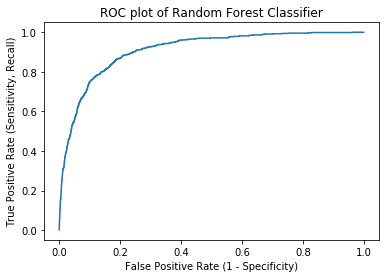

In [106]:
probabilities = rfc.predict_proba(X_test)[:, 1]

tpr, fpr, thresholds = roc_curve_(probabilities, y_test)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity, Recall)")
plt.title("ROC plot of Random Forest Classifier")
plt.show()